# Name Game 
nysiis

In [1]:
#importing important libraries to be utilized
import fuzzy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#example to showcase that the words that sound same have same phonetic coding
print(fuzzy.nysiis('color'))
print(fuzzy.nysiis('colour'))

CALAR
CALAR


In [3]:
fuzzy.nysiis('grey') == fuzzy.nysiis('gray')

True

In [4]:
#creating a data frame 
data = pd.read_csv('nytkids_yearly.csv', sep = ';')
first_name = []
for name in data['Author']:
    full = name.split( )
    first_name.append(full[0])
data['first_name'] = first_name
data.head(20)

,Year,Book Title,Author,Besteller this year,first_name
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea
5,2017,SHE PERSISTED,Chelsea Clinton,26,Chelsea
6,2017,THE BOOK WITH NO PICTURES,Benjamin J. Novak,24,Benjamin
7,2017,WHAT DO YOU DO WITH AN IDEA?,Kobi Yamada,21,Kobi
8,2017,DRAGONS LOVE TACOS 2,Adam Rubin and Daniel Salmieri,17,Adam
9,2017,WE'RE ALL WONDERS,R. J. Palacio,16,R.


In [5]:
phonic_names = []
for name in data['first_name']:
    phonic_names.append(fuzzy.nysiis(name))
data['phonic_names'] = phonic_names
data.head(20)

,Year,Book Title,Author,Besteller this year,first_name,phonic_names
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam,ADAN
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily,ENALY
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew,DR
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea,ANDR
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea,ANDR
5,2017,SHE PERSISTED,Chelsea Clinton,26,Chelsea,CALS
6,2017,THE BOOK WITH NO PICTURES,Benjamin J. Novak,24,Benjamin,BANJANAN
7,2017,WHAT DO YOU DO WITH AN IDEA?,Kobi Yamada,21,Kobi,CAB
8,2017,DRAGONS LOVE TACOS 2,Adam Rubin and Daniel Salmieri,17,Adam,ADAN
9,2017,WE'RE ALL WONDERS,R. J. Palacio,16,R.,R


In [6]:
nysiis_db = pd.read_csv('babynames_nysiis.csv', sep=';')
nysiis_db.head(10)

,babynysiis,perc_female,perc_male
0,NaN,62.50,37.50
1,RAX,63.64,36.36
2,ESAR,44.44,55.56
3,DJANG,0.00,100.00
4,PARCAL,25.00,75.00
5,VALCARY,100.00,0.00
6,FRANCASC,63.64,36.36
7,CABAT,50.00,50.00
8,XANDAR,16.67,83.33
9,RACSAN,33.33,66.67


In [7]:
nysiis_db = pd.read_csv('babynames_nysiis.csv', sep=';')
gender = []
for per_m,per_f in zip(nysiis_db['perc_male'], nysiis_db['perc_female']):
    if per_m > per_f:
        gender.append('M')
    elif per_m < per_f:
        gender.append('F')
    else:
        gender.append('N')
nysiis_db['gender'] = gender
nysiis_db.head(10)

,babynysiis,perc_female,perc_male,gender
0,NaN,62.50,37.50,F
1,RAX,63.64,36.36,F
2,ESAR,44.44,55.56,M
3,DJANG,0.00,100.00,M
4,PARCAL,25.00,75.00,M
5,VALCARY,100.00,0.00,F
6,FRANCASC,63.64,36.36,F
7,CABAT,50.00,50.00,N
8,XANDAR,16.67,83.33,M
9,RACSAN,33.33,66.67,M


In [8]:
#defining a function to find the location of the author's phonic name in nysiis database
def location(list, element):
    if element in list:
        loc = list.index(element)
    else:
        return -1
    return(loc)

author_gender = []
for p_name in data['phonic_names']:
    locat = location(list(nysiis_db['babynysiis']), p_name)
    if locat < 0:
        author_gender.append('Unknown')
    else:
        author_gender.append(nysiis_db['gender'][locat])
data['gender'] = author_gender

In [9]:
data['gender'].value_counts()

F          395
M          191
Unknown      9
N            8
Name: gender, dtype: int64

In [10]:
years = np.array(sorted(list(set(data.Year))))
years

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [11]:
data.head(10)

,Year,Book Title,Author,Besteller this year,first_name,phonic_names,gender
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam,ADAN,M
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily,ENALY,F
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew,DR,M
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea,ANDR,M
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea,ANDR,M
5,2017,SHE PERSISTED,Chelsea Clinton,26,Chelsea,CALS,F
6,2017,THE BOOK WITH NO PICTURES,Benjamin J. Novak,24,Benjamin,BANJANAN,M
7,2017,WHAT DO YOU DO WITH AN IDEA?,Kobi Yamada,21,Kobi,CAB,M
8,2017,DRAGONS LOVE TACOS 2,Adam Rubin and Daniel Salmieri,17,Adam,ADAN,M
9,2017,WE'RE ALL WONDERS,R. J. Palacio,16,R.,R,F


In [13]:
male_by_year = []
female_by_year = []
unknown_by_year = []

for year in years:
    male_by_year.append(len(data[(data['gender'] == 'M') & (data['Year'] == year)]))
    female_by_year.append(len(data[(data['gender'] == 'F') & (data['Year'] == year)]))
    unknown_by_year.append(len(data[(data['gender'] == 'N') & (data['Year'] == year)]))

male_by_year, female_by_year, unknown_by_year    

([8, 19, 27, 21, 21, 11, 21, 18, 25, 20],
 [15, 45, 48, 51, 46, 51, 34, 30, 32, 43],
 [1, 0, 1, 1, 2, 1, 1, 0, 1, 0])

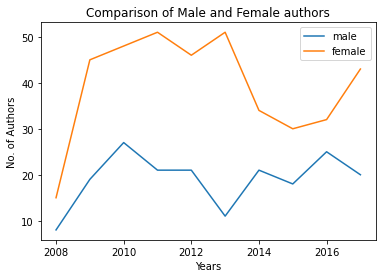

In [14]:
%matplotlib inline

plt.plot(years, male_by_year)
plt.plot(years, female_by_year)
plt.title('Comparison of Male and Female authors')
plt.xlabel('Years')
plt.ylabel('No. of Authors')
plt.legend(['male', 'female'], loc= 'upper right')

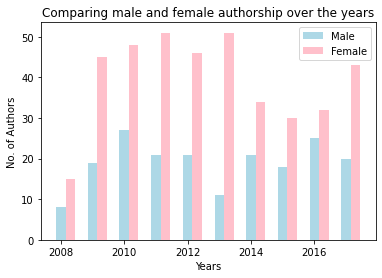

In [15]:
width = 0.30
plt.bar(years, male_by_year, width, color='lightblue')
plt.bar(years+0.30, female_by_year, width, color='pink')
plt.title('Comparing male and female authorship over the years')
plt.xlabel('Years')
plt.ylabel('No. of Authors')
plt.legend(['Male', 'Female'])